In [1]:
import cv2
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
image = np.zeros((300, 300, 3))

In [3]:
image = np.zeros((300, 300, 3))

pts1 = np.array([[100, 100], [200, 100],
                [200, 50], [100, 50]
               ],
               np.int32)
 
pts1 = pts1.reshape((-1, 1, 2))

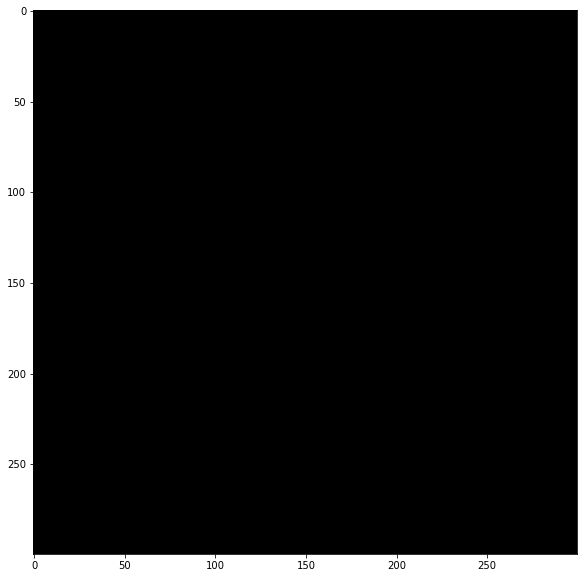

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [5]:
def rotateTheta(x, y, theta):
    x_rot_theta  = x * np.cos(theta) + y * np.sin(theta)
    y_rot_theta = y * np.cos(theta) - x * np.sin(theta)
    
    return x_rot_theta, y_rot_theta

In [7]:
theta = 30 * np.pi / 180

In [8]:
c_x = 150
c_y = 75
width = 50
height = 50
x_prime, y_prime = rotateTheta(-width / 2, height / 2, theta)
print(c_x + x_prime, c_y - y_prime)

x_prime, y_prime = rotateTheta(width / 2, height / 2, theta)
print(c_x + x_prime, c_y - y_prime)

x_prime, y_prime = rotateTheta(width / 2, -height / 2, theta)
print(c_x + x_prime, c_y - y_prime)

x_prime, y_prime = rotateTheta(-width / 2, -height / 2, theta)
print(c_x + x_prime, c_y - y_prime)


def rotateRectangle(c_x, c_y, width, height, theta):
    newRect = []
    
    corners = [
        [-width / 2, -height / 2],
        [width / 2, -height / 2],
        [width / 2, height / 2],
        [-width / 2, height / 2]
    ]
    
    for corner in corners:
        x_prime, y_prime = rotateTheta(corner[0], corner[1], theta)
        newRect.append([c_x + x_prime, c_y + y_prime])
    
    return newRect

rotateRectangle(c_x, c_y, width, height, theta)

140.84936490538902 40.84936490538903
184.15063509461098 65.84936490538902
159.15063509461098 109.15063509461098
115.84936490538902 84.15063509461098


[[115.84936490538902, 65.84936490538902],
 [159.15063509461098, 40.84936490538903],
 [184.15063509461098, 84.15063509461098],
 [140.84936490538902, 109.15063509461098]]

In [9]:
image = np.zeros((300, 300, 3))

# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 1
 
# Using cv2.polylines() method
# Draw a Blue polygon with
# thickness of 1 px
# image = cv2.polylines(image, [pts1],
#                       True, color, thickness)


for t in [0, 30, 60, 90, 120, 150]:
    theta = t * np.pi / 180

    pts2 = np.array(rotateRectangle(c_x, c_y, width, height, theta),
                   np.int32)

    pts2 = pts2.reshape((-1, 1, 2))

    image = cv2.polylines(image, [pts2],
                          True, color, thickness)

image = cv2.circle(image, (150, 75), radius=1, color=(255, 0, 255), thickness=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


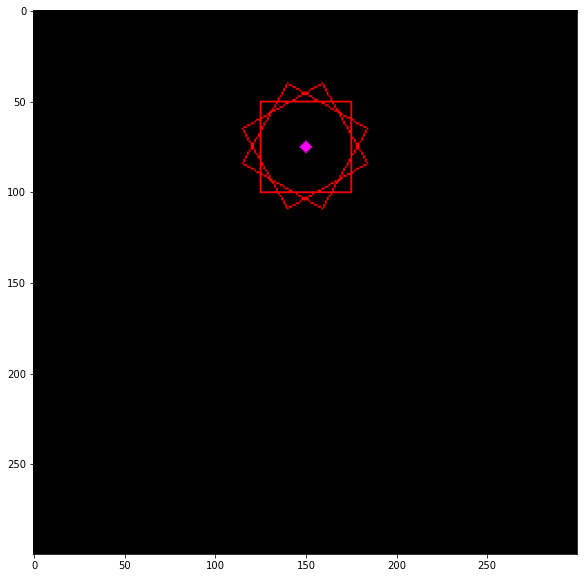

In [10]:
plt.figure(figsize=(10,10))

plt.imshow(image)

In [11]:
height / 2

25.0

In [12]:
rotateTheta(-width / 2, height / 2, theta)

(34.15063509461097, -9.150635094610971)

In [13]:
c_x = 150
c_y = 75
width = 100
height = 50
x_prime, y_prime = rotateTheta(-width / 2, height / 2, theta)
print(c_x + x_prime, c_y - y_prime)

x_prime, y_prime = rotateTheta(width / 2, height / 2, theta)
print(c_x + x_prime, c_y - y_prime)

x_prime, y_prime = rotateTheta(width / 2, -height / 2, theta)
print(c_x + x_prime, c_y - y_prime)

x_prime, y_prime = rotateTheta(-width / 2, -height / 2, theta)
print(c_x + x_prime, c_y - y_prime)

205.80127018922195 71.65063509461098
119.19872981077806 121.65063509461096
94.19872981077806 78.34936490538902
180.80127018922195 28.349364905389038


In [14]:
x_prime, y_prime

(30.80127018922194, 46.65063509461096)

In [15]:
c_x + x_prime, c_y + y_prime

(180.80127018922195, 121.65063509461096)

In [16]:
print(c_x - x_prime, c_y + y_prime)
print(c_x + x_prime, c_y - y_prime)
print(c_x + x_prime, c_y + y_prime)
print(c_x - x_prime, c_y + y_prime)

119.19872981077806 121.65063509461096
180.80127018922195 28.349364905389038
180.80127018922195 121.65063509461096
119.19872981077806 121.65063509461096


In [17]:
np.cos(np.pi)

-1.0

In [18]:
np.cos(45 * np.pi / 180)

0.7071067811865476

In [62]:
feature_map_shapes = [38, 19, 10, 5, 3, 1]

aspect_ratios = [
    [1, 2, 0.5],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 0.5],
    [1, 2, 0.5]
]

number_of_feature_maps = 6

def calculate_scale_of_default_boxes(k, m, s_max = 0.9, s_min = 0.2):
    """
    m = number_of_feature_maps
    s_k = s_min + (s_max - s_min) * (k - 1)/(m - 1)
    width_k = s_k * sqrt(aspect_ratio)
    height_k = s_k / sqrt(aspect_ratio)
    """
    return s_min + (s_max - s_min) * (k - 1) / (m - 1)

image = np.zeros((300, 300, 3))
c_x = 150
c_y = 150

for k, f_k in enumerate(feature_map_shapes[:2]):
    if k==1:
        s_k = calculate_scale_of_default_boxes(k, m = number_of_feature_maps)
        s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = 6))
        print(s_k * 300, s_k_prime * 300)

        width = int(s_k * 300 / 2)
        height = int(s_k_prime * 300 / 2)

        image = cv2.rectangle(image, (c_x - width, c_y - height), (c_x + width, c_y + height), 
                             color, thickness)

        for ar in aspect_ratios[k]:
            width = int(s_k*np.sqrt(ar) * 300 / 2)
            height = int(s_k/np.sqrt(ar) * 300 / 2)
            image = cv2.rectangle(image, (c_x - width, c_y - height), (c_x + width, c_y + height), 
                             color, thickness)

60.0 78.23042886243178


In [63]:
for k, f_k in enumerate(feature_map_shapes[:2]):
    if k==1:
        s_k = calculate_scale_of_default_boxes(k, m = number_of_feature_maps)
        s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = 6))
        for angle in [0, 45]:
            print(rotateRectangle(c_x, c_y, s_k, s_k, angle))

[[149.9, 149.9], [150.1, 149.9], [150.1, 150.1], [149.9, 150.1]]
[[149.8623774486648, 150.03255815357164], [149.96744184642836, 149.8623774486648], [150.1376225513352, 149.96744184642836], [150.03255815357164, 150.1376225513352]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


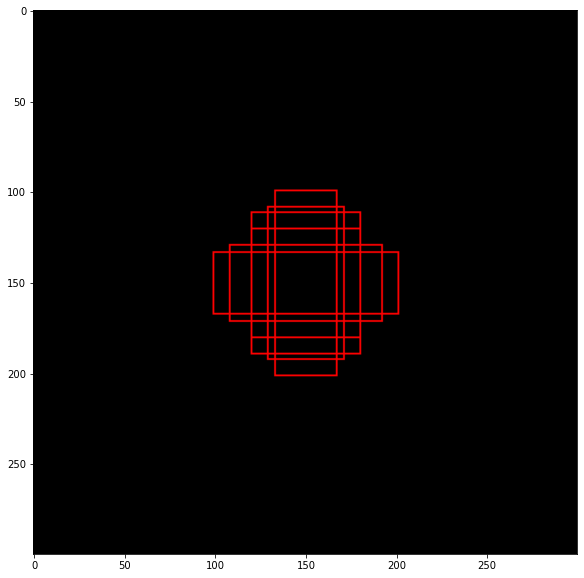

In [64]:
plt.figure(figsize=(10,10))

plt.imshow(image)

In [65]:
import sys

In [66]:
from bbox_utils.bbox import generate_default_boxes

In [83]:
feature_map_shapes = [38, 19, 10, 5, 3, 1]

aspect_ratios = [
    [2, 0.5],
    [2, 3, 0.5, 0.333],
    [2, 3, 0.5, 0.333],
    [2, 3, 0.5, 0.333],
    [2, 0.5],
    [2, 0.5]
]
angles = [0, 45, 90, 135]

prior_boxes = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

In [84]:
len(prior_boxes)

31048

In [85]:
pd.DataFrame(prior_boxes)

,0,1,2,3,4,5,6,7
0,-0.016842,-0.016842,0.043158,-0.016842,0.043158,0.043158,-0.016842,0.043158
1,-0.029269,0.013158,0.013158,-0.029269,0.055584,0.013158,0.013158,0.055584
2,-0.016842,-0.041614,0.043158,-0.041614,0.043158,0.067930,-0.016842,0.067930
3,-0.046785,-0.004359,-0.004359,-0.046785,0.073101,0.030675,0.030675,0.073101
4,-0.041614,0.043158,-0.041614,-0.016842,0.067930,-0.016842,0.067930,0.043158
...,...,...,...,...,...,...,...,...
31043,0.690000,1.070000,-0.070000,0.310000,0.310000,-0.070000,1.070000,0.690000
31044,0.231299,-0.037401,0.768701,-0.037401,0.768701,1.037401,0.231299,1.037401
31045,-0.070000,0.310000,0.310000,-0.070000,1.070000,0.690000,0.690000,1.070000
31046,-0.037401,0.768701,-0.037401,0.231299,1.037401,0.231299,1.037401,0.768701


In [86]:
df = pd.DataFrame(prior_boxes) * 300
df = df.astype(int)

In [87]:
df.head()

,0,1,2,3,4,5,6,7
0,-5,-5,12,-5,12,12,-5,12
1,-8,3,3,-8,16,3,3,16
2,-5,-12,12,-12,12,20,-5,20
3,-14,-1,-1,-14,21,9,9,21
4,-12,12,-12,-5,20,-5,20,12


In [88]:
df.drop_duplicates()

,0,1,2,3,4,5,6,7
0,-5,-5,12,-5,12,12,-5,12
1,-8,3,3,-8,16,3,3,16
2,-5,-12,12,-12,12,20,-5,20
3,-14,-1,-1,-14,21,9,9,21
4,-12,12,-12,-5,20,-5,20,12
...,...,...,...,...,...,...,...,...
31043,207,321,-21,92,92,-21,321,207
31044,69,-11,230,-11,230,311,69,311
31045,-21,93,93,-21,321,206,206,321
31046,-11,230,-11,69,311,69,311,230


In [89]:
corners = np.array(prior_boxes[10001]) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

In [90]:
np.arange(100, 200)

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [115]:
image = np.zeros((300, 300, 3))
 
for i in np.arange(31040, 31048, 1):
    corners = np.array(prior_boxes[i]) * 300
    
    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)
    
    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, color, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


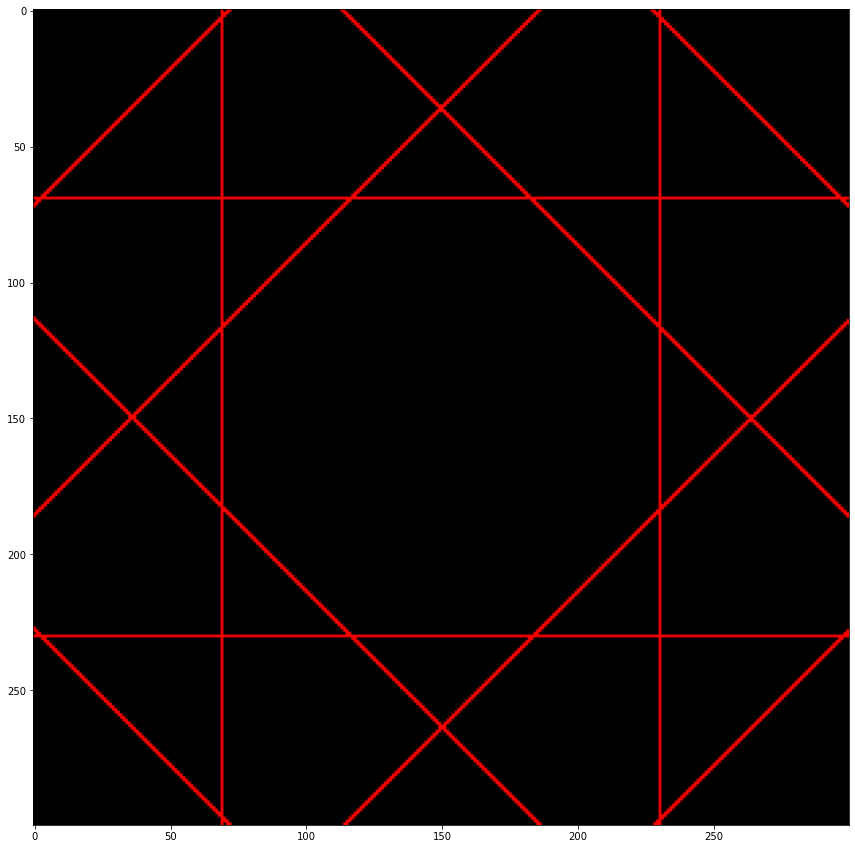

In [116]:
plt.figure(figsize=(15,15))

plt.imshow(image)